In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('Datasets/Salary_Data.csv')

X = np.array(dataset.iloc[:, 0])
y = np.array(dataset.iloc[:, 1])

dataset.sample(2)

,YearsExperience,Salary
0,1.1,39343.0
18,5.9,81363.0


In [2]:
import statsmodels.api as sm

ols = sm.OLS(endog = y, exog = sm.add_constant(X)).fit() 
ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.955     
Dependent Variable: y                AIC:                606.8823  
Date:               2020-07-13 21:39 BIC:                609.6847  
No. Observations:   30               Log-Likelihood:     -301.44   
Df Model:           1                F-statistic:        622.5     
Df Residuals:       28               Prob (F-statistic): 1.14e-20  
R-squared:          0.957            Scale:              3.3505e+07
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     25792.2002 2273.0534 11.3469 0.0000 21136.0613 30448.3391
x1         9449.9623  378.7546 24.9501 0.0000  8674.1187 10225.8059
-------------------------------------------------------------------
Omnibus:                2.140        Durbin-Watson:           1.648
Prob(Omnibus):          0.343        Jarque-Bera (JB):        1.569
Skew:                   0.363        Prob(JB):                0.456
Kurtosis:               2.147        Condition No.:           13   
===================================================================

"""

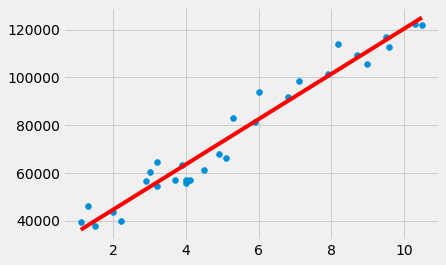

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pred_ols = ols.predict(sm.add_constant(X))

plt.scatter(X, y)
plt.plot(X, pred_ols, color = 'red')
plt.show()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

m = 9449.962323709779 and b = 25792.200183474863


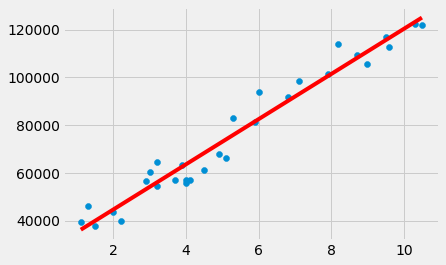

In [11]:
list_m = []
list_b = []

m, b, n, num_of_iterations, learning_rate = 0, 0, len(X), 10000, .01
for i in range(num_of_iterations):
    ddm = - 1/n * sum((y - m*X - b) * X)
    ddb = - 1/n * sum(y - m*X - b)
    m = m - (ddm * learning_rate)
    b = b - (ddb * learning_rate)
    list_m.append(m)
    list_b.append(b)
    
    
    
print(f'm = {m} and b = {b}')

pred_gd_1 = [(m*x + b) for x in X]

plt.scatter(X, y)
plt.plot(X, pred_gd_1, color = 'red')
plt.show()

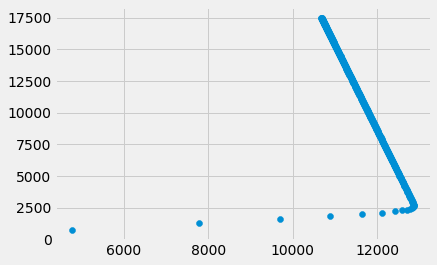

In [12]:
plt.scatter(list_m[:500], list_b[:500])

m = 12316.105337681542 and b = 6478.023133074989


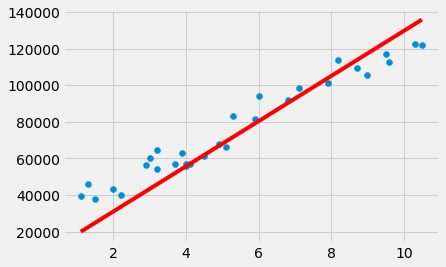

In [13]:
m, b, n, num_of_iterations, learning_rate = 0, 0, len(X), 1000, .001
for i in range(num_of_iterations):
    ddm = - 1/n * sum((y - m*X - b) * X)
    ddb = - 1/n * sum(y - m*X - b)
    m = m - (ddm * learning_rate)
    b = b - (ddb * learning_rate)
    
    
    
print(f'm = {m} and b = {b}')

pred_gd_1 = [(m*x + b) for x in X]

plt.scatter(X, y)
plt.plot(X, pred_gd_1, color = 'red')
plt.show()

m = 12299.272663200205


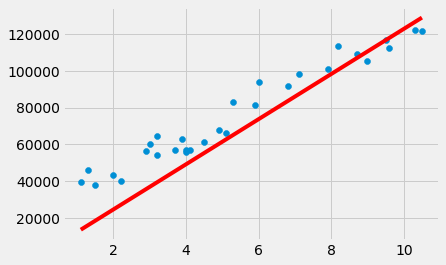

In [7]:
m, n, num_of_iterations, learning_rate = 0, len(X), 1000, .001
for i in range(num_of_iterations):
    ddm = - 1/n * sum((y - m*X - b) * X)
    m = m - (ddm * learning_rate)

    
    
print(f'm = {m}')
    
pred_gd_2 = [(m*x) for x in X]

plt.scatter(X, y)
plt.plot(X, pred_gd_2, color = 'red')
plt.show()

In [8]:
pd.DataFrame(list(zip(pred_ols, y, pred_gd_1, pred_gd_2)), columns = ['statsmodels.api', 'Original', 'GradientDescent model1', 'GradientDescent model2'])

,statsmodels.api,Original,GradientDescent model1,GradientDescent model2
0,14580.432300,39343.0,20025.739005,13529.199930
1,17231.419991,46205.0,22488.960072,15989.054462
2,19882.407682,37731.0,24952.181140,18448.908995
3,26509.876909,43525.0,31110.233808,24598.545326
4,29160.864600,39891.0,33573.454876,27058.399859
5,38439.321518,56642.0,42194.728612,35667.890723
6,39764.815363,60150.0,43426.339146,36897.817990
7,42415.803054,54445.0,45889.560214,39357.672522
8,42415.803054,64445.0,45889.560214,39357.672522
9,49043.272281,57189.0,52047.612882,45507.308854
